In [1]:
import ROOT as rt
import array as arr
import math

from strangehelper import get_parabola, make_mixed_corrections

Welcome to JupyROOT 6.24/06


In [2]:
rt.gStyle.SetOptStat(0)

In [3]:
# epsilon used to avoid bin edge nightmares (if you pick a value that lies on bin edge, it defaults to right bin)
EPSILON = 0.00001

In [4]:
LAMBDA_PT_LOW = 2 
LAMBDA_PT_HIGH = 4 - EPSILON

In [5]:
SIG_MIN = 1.08 
SIG_MAX = 1.16 - EPSILON

In [6]:
c = rt.TCanvas("main_canvas", "Main Canvas", 55, 55, 800, 600)
c.SetRightMargin(0.05)
c.SetLeftMargin(0.15)
c.SetTopMargin(0.05)


In [7]:
input_file = rt.TFile("../online/two/bg_comparisons.root")
input_list = input_file.Get("h-lambda")

In [8]:
lambda_dist = input_list.FindObject("fLambdaDist")
lambda_dist_bg = input_list.FindObject("fLambdaBGDist")
lambda_dist_rotated = input_list.FindObject("fLambdaRotatedDaughtersDist")
lambda_dist_ls = input_list.FindObject("fLambdaLSDaughtersDist")
lambda_dist_no_bg = input_list.FindObject("fLambdaDist_checkMC")
lambda_dist_mc = input_list.FindObject("fLambdaDist_MC")

In [9]:
# Setting the associated Pt (this is never changed again)
lambda_dist.GetAxis(0).SetRangeUser(LAMBDA_PT_LOW, LAMBDA_PT_HIGH)
lambda_dist_rotated.GetAxis(0).SetRangeUser(LAMBDA_PT_LOW, LAMBDA_PT_HIGH)
lambda_dist_ls.GetAxis(0).SetRangeUser(LAMBDA_PT_LOW, LAMBDA_PT_HIGH)
lambda_dist_no_bg.GetAxis(0).SetRangeUser(LAMBDA_PT_LOW, LAMBDA_PT_HIGH)
lambda_dist_bg.GetAxis(0).SetRangeUser(LAMBDA_PT_LOW, LAMBDA_PT_HIGH)
lambda_dist_mc.GetAxis(0).SetRangeUser(LAMBDA_PT_LOW, LAMBDA_PT_HIGH)

### Signal analysis section

In [10]:
# eta cuts first
lambda_dist.GetAxis(2).SetRangeUser(-0.8, 0.8 - EPSILON)
lambda_dist_rotated.GetAxis(2).SetRangeUser(-0.8, 0.8 - EPSILON)
lambda_dist_ls.GetAxis(2).SetRangeUser(-0.8, 0.8 - EPSILON)
lambda_dist_no_bg.GetAxis(2).SetRangeUser(-0.8, 0.8 - EPSILON)
lambda_dist_bg.GetAxis(2).SetRangeUser(-0.8, 0.8 - EPSILON)
lambda_dist_mc.GetAxis(2).SetRangeUser(-0.8, 0.8 - EPSILON)

In [11]:
lambda_mass_dist = lambda_dist.Projection(3).Clone("lambda_mass_dist")
lambda_mass_dist_rotated = lambda_dist_rotated.Projection(3).Clone("lambda_mass_dist_rotated")
lambda_mass_dist_ls = lambda_dist_ls.Projection(3).Clone("lambda_mass_dist_ls")
lambda_mass_dist_subtractedbg = lambda_dist.Projection(3).Clone("lambda_mass_dist_subtractedbg")
lambda_mass_dist_nobg = lambda_dist_no_bg.Projection(3).Clone("lambda_mass_dist_no_bg")
lambda_mass_dist_bg = lambda_dist_bg.Projection(3).Clone("lambda_mass_dist_bg")
lambda_mass_dist_mc = lambda_dist_mc.Projection(3).Clone("lambda_mass_mc")

Warning in <TFile::Append>: Replacing existing TH1: fLambdaDist_proj_3 (Potential memory leak).


In [12]:
RSB_LOW = 1.22
RSB_HIGH = 1.26 - EPSILON

rsb_lowbin = lambda_mass_dist.FindBin(RSB_LOW)
rsb_highbin = lambda_mass_dist.FindBin(RSB_HIGH)

lambda_mass_dist_rotated.Scale(lambda_mass_dist_bg.Integral(rsb_lowbin, rsb_highbin) / lambda_mass_dist_rotated.Integral(rsb_lowbin, rsb_highbin))
lambda_mass_dist_ls.Scale(lambda_mass_dist_bg.Integral(rsb_lowbin, rsb_highbin) / lambda_mass_dist_ls.Integral(rsb_lowbin, rsb_highbin))

In [13]:
lambda_mass_dist_subtractedbg.Add(lambda_mass_dist_ls, -1)

True

In [14]:
lambda_mass_dist.SetTitle("")
lambda_mass_dist.SetLineWidth(2)
lambda_mass_dist.SetLineColor(rt.kBlack)
lambda_mass_dist.SetMarkerStyle(20)
lambda_mass_dist.SetMarkerSize(0.5)
lambda_mass_dist.SetMarkerColor(rt.kBlack)
lambda_mass_dist.GetXaxis().SetTitle("M_{p#pi} (GeV/c^{2})")
lambda_mass_dist.GetYaxis().SetTitleOffset(0)
lambda_mass_dist.GetYaxis().SetLabelSize(0.03)
lambda_mass_dist.GetYaxis().SetTitleSize(0.04)
lambda_mass_dist.GetXaxis().SetTitleSize(0.04)
lambda_mass_dist.GetYaxis().SetTitle("Counts/[10 MeV/c^{2}]")

In [15]:
lambda_mass_dist_bg.SetLineWidth(2)
lambda_mass_dist_bg.SetLineColor(rt.kRed)
lambda_mass_dist_bg.SetMarkerStyle(20)
lambda_mass_dist_bg.SetMarkerSize(0.5)
lambda_mass_dist_bg.SetMarkerColor(rt.kRed)

In [16]:
lambda_mass_dist_rotated.SetLineWidth(2)
lambda_mass_dist_rotated.SetLineColor(rt.kOrange)
lambda_mass_dist_rotated.SetMarkerStyle(20)
lambda_mass_dist_rotated.SetMarkerSize(0.5)
lambda_mass_dist_rotated.SetMarkerColor(rt.kOrange)

In [17]:
lambda_mass_dist_ls.SetLineWidth(2)
lambda_mass_dist_ls.SetLineColor(rt.kViolet - 6)
lambda_mass_dist_ls.SetMarkerStyle(20)
lambda_mass_dist_ls.SetMarkerSize(0.5)
lambda_mass_dist_ls.SetMarkerColor(rt.kViolet - 6)

In [18]:
lambda_mass_dist_nobg.SetLineWidth(2)
lambda_mass_dist_nobg.SetLineColor(rt.kMagenta)
lambda_mass_dist_nobg.SetMarkerStyle(20)
lambda_mass_dist_nobg.SetMarkerSize(0.5)
lambda_mass_dist_nobg.SetMarkerColor(rt.kMagenta)

In [19]:
lambda_mass_dist_subtractedbg.SetLineWidth(2)
lambda_mass_dist_subtractedbg.SetLineColor(rt.kGreen + 2)
lambda_mass_dist_subtractedbg.SetMarkerStyle(20)
lambda_mass_dist_subtractedbg.SetMarkerSize(0.5)
lambda_mass_dist_subtractedbg.SetMarkerColor(rt.kGreen + 2)

In [20]:
mass_legend = rt.TLegend(0.6, 0.4, 0.9, 0.6)
mass_legend.SetBorderSize(0)
mass_legend.SetFillStyle(0)
mass_legend.AddEntry(lambda_mass_dist, "Total (sig. + comb. BG)", "lp")
# mass_legend.AddEntry(lambda_mass_dist_bg, "p-#pi comb. BG", "lp")
mass_legend.AddEntry(lambda_mass_dist_rotated, "Rotated p-#pi BG", "lp")
mass_legend.AddEntry(lambda_mass_dist_ls, "Like-sign p-#pi BG", "lp")
mass_legend.AddEntry(lambda_mass_dist_nobg, "Raw signal (p-#pi from same #Lambda)", "lp")
mass_legend.AddEntry(lambda_mass_dist_subtractedbg, "Extracted signal (Total - rotated daughter BG)", "lp")

Info in <TCanvas::Print>: pdf file figure.pdf has been created


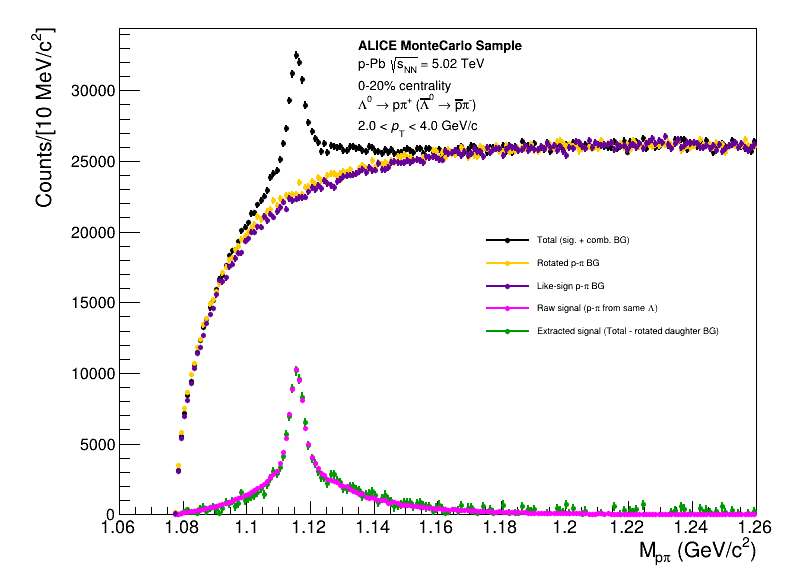

In [32]:
lambda_mass_dist.Draw()
# lambda_mass_dist_bg.Draw("same")
lambda_mass_dist_subtractedbg.Draw("same")
lambda_mass_dist_nobg.Draw("same")
lambda_mass_dist_rotated.Draw("same")
lambda_mass_dist_ls.Draw("same")
mass_legend.Draw("same")

alice_data_label = rt.TLatex()
alice_data_label.SetNDC()
alice_data_label.SetTextSize(0.025)
alice_data_label.SetTextAlign(13)
alice_data_label.DrawLatex(0.45, 0.93, "ALICE MonteCarlo Sample")
alice_data_label.DrawLatex(0.45, 0.90, "#bf{p-Pb #sqrt{s_{NN}} = 5.02 TeV}")
alice_data_label.DrawLatex(0.45, 0.86, "#bf{0-20% centrality}")
alice_data_label.DrawLatex(0.45, 0.835, "#bf{#Lambda^{0} #rightarrow p#pi^{+} (#bar{#Lambda}^{0} #rightarrow #bar{p}#pi^{-})}")
alice_data_label.DrawLatex(0.45, 0.79, "#bf{2.0 < #it{p}_{T} < 4.0 GeV/c}")



c.Draw()
c.SaveAs("figure.pdf")

In [ ]:
mc_template_outfile = rt.TFile("mc_templates.root", "RECREATE")
mc_template_outfile.cd()
lambda_mass_dist.Write("lambda_mass_dist")
lambda_mass_dist_nobg.Write("lambda_mass_dist_nobg")

In [28]:
lambda_mass_dist_nobg.SetLineWidth(2)

In [81]:
lambda_mass_dist_mc.SetLineWidth(2)

In [76]:
print(lambda_mass_dist_nobg.Integral())
print(lambda_mass_dist_mc.Integral())

243707.57878375053
243201.0


Error in <TH1D::Add>: Attempt to add histograms with different number of bins : nbins h1 = 100 , nbins h2 =  200


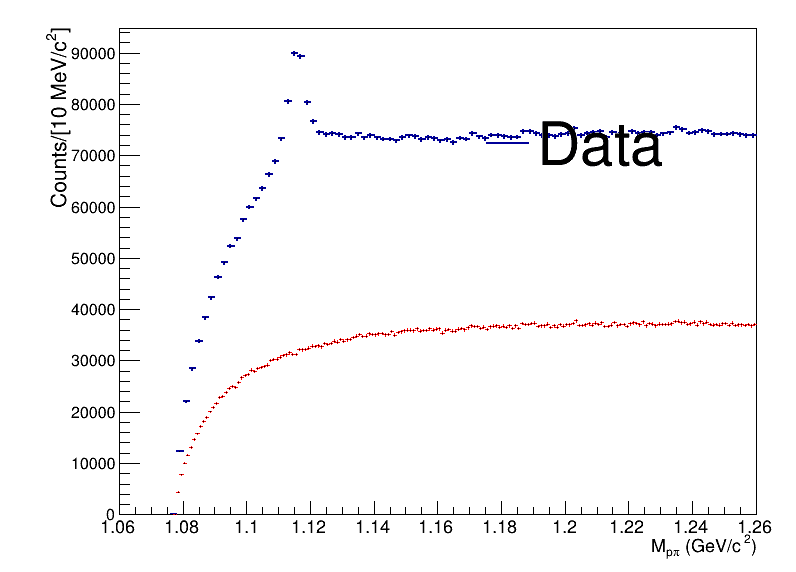

In [77]:

lambda_mass_dist.GetXaxis().SetRangeUser(1.06, 1.26)
lambda_mass_dist.Add(lambda_mass_dist_bg, -1)
lambda_mass_dist_bg.SetLineColor(rt.kRed)
lambda_mass_dist_bg.Draw("SAME")
c.Draw()

In [87]:
left_bin = lambda_mass_dist_nobg.FindBin(SIG_MIN)
right_bin = lambda_mass_dist_nobg.FindBin(SIG_MAX)
range_integral = lambda_mass_dist_nobg.Integral(left_bin, right_bin)
print(range_integral/lambda_mass_dist_nobg.Integral())


0.8199415575936458


In [84]:
bin_1 = lambda_mass_dist_0_20.FindBin(1.09)
bin_2 = lambda_mass_dist_0_20.FindBin(1.15)
bin_3 = lambda_mass_dist_0_20.FindBin(1.16 - EPSILON)
point_one = [1.09, lambda_mass_dist_0_20.GetBinContent(bin_1)]
point_two = [1.15, lambda_mass_dist_0_20.GetBinContent(bin_2)]
point_three = [1.16, lambda_mass_dist_0_20.GetBinContent(bin_3)]
bg_starting_params_0_20 = get_parabola(point_one, point_two, point_three)

In [85]:
lambda_mass_fit_0_20 = rt.TF1("lambda_mass_fit_0_20", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.155)
lambda_mass_fit_0_20.SetNpx(1000)
lambda_mass_fit_0_20.SetParameter(0, 1.36753e00)
lambda_mass_fit_0_20.SetParameter(1, 1.116)
lambda_mass_fit_0_20.SetParameter(2, 1.00576e-03)
lambda_mass_fit_0_20.SetParameter(3, 6.04166e-03)
lambda_mass_fit_0_20.SetParameter(4, bg_starting_params_0_20[0])
lambda_mass_fit_0_20.SetParameter(5, bg_starting_params_0_20[1])
lambda_mass_fit_0_20.SetParameter(6, bg_starting_params_0_20[2])

 FCN=270.975 FROM HESSE     STATUS=NOT POSDEF     50 CALLS         940 TOTAL
                     EDM=3.15295e-08    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.82089e+02   1.72575e+00   2.41911e-03  -3.41850e-06
   2  p1           1.11597e+00   6.53078e-06   2.66069e-07  -7.32412e+00
   3  p2           1.35724e-03   1.36129e-05   1.15033e-08   6.11700e+00
   4  p3           1.45538e-03   2.72875e-05   2.03759e-08  -6.57835e+00
   5  p4           1.22903e+05   1.71943e+02   2.93024e-02  -1.65521e-05
   6  p5          -2.44105e+05   1.64761e+02   5.81992e-02  -1.84079e-05
   7  p6           1.21283e+05   1.36703e+02   2.89162e-02  -2.04761e-05


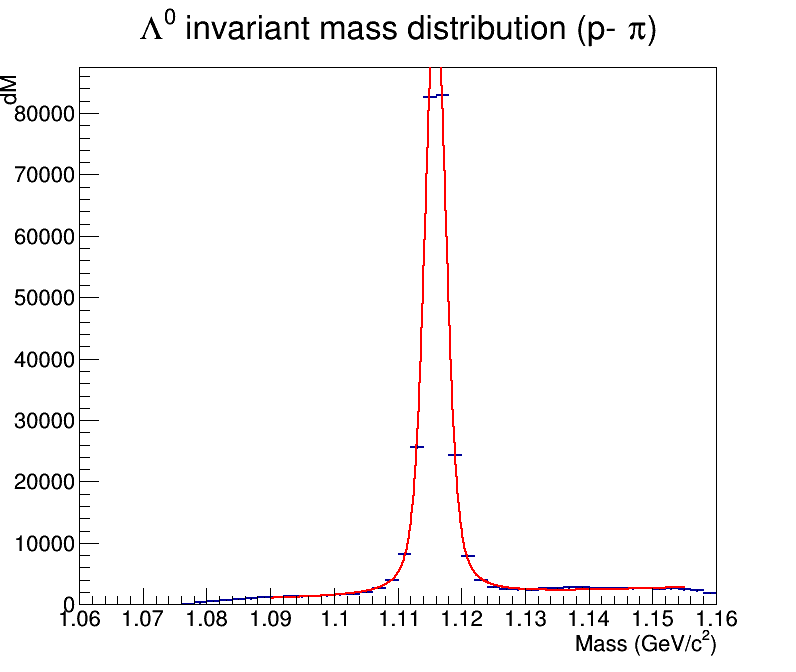

In [110]:
lambda_mass_dist_fit_0_20 = lambda_mass_dist_0_20.Clone("lambda_mass_dist_fit_0_20")
lambda_mass_dist_fit_0_20.Fit(lambda_mass_fit_0_20, "RS")
lambda_mass_dist_fit_0_20.Draw()
c.Draw()

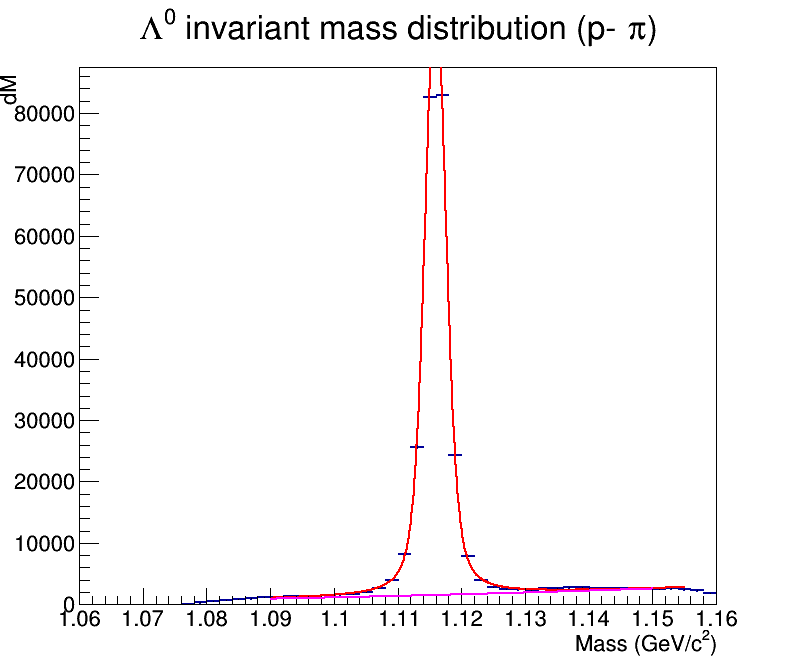

In [111]:
bg_fit_0_20 = rt.TF1("bg_fit_0_20", "pol2", 1.09, 1.15)
bg_fit_0_20.SetParameter(0, lambda_mass_fit_0_20.GetParameter(4))
bg_fit_0_20.SetParameter(1, lambda_mass_fit_0_20.GetParameter(5))
bg_fit_0_20.SetParameter(2, lambda_mass_fit_0_20.GetParameter(6))
bg_fit_0_20.SetNpx(1000)
bg_fit_0_20.SetLineColor(rt.kMagenta)
bg_fit_0_20.Draw("SAME")
c.Draw()

In [112]:
left_signal_bin_0_20 = lambda_mass_dist_fit_0_20.FindBin(SIG_MIN)
right_signal_bin_0_20 = lambda_mass_dist_fit_0_20.FindBin(SIG_MAX)

lambda_bg_0_20 = 0
lambda_total_0_20 = 0
for bin_num in range(left_signal_bin_0_20, right_signal_bin_0_20 + 1):
    bin_center = lambda_mass_dist_fit_0_20.GetBinCenter(bin_num)
    lambda_bg_0_20 += bg_fit_0_20.Eval(bin_center)
    lambda_total_0_20 += lambda_mass_dist_fit_0_20.GetBinContent(bin_num)

lambda_signal_0_20 = lambda_total_0_20 - lambda_bg_0_20
lambda_signal_total_ratio_0_20 = lambda_signal_0_20/lambda_total_0_20
lambda_signal_bg_ratio_0_20 = lambda_signal_0_20/lambda_bg_0_20
print(f"The 0-20 lambda signal is: {lambda_signal_0_20}")
print(f"The 0-20 lambda background is: {lambda_bg_0_20}")
print(f"The 0-20 lambda S/B is: {lambda_signal_bg_ratio_0_20}")
print(f"The 0-20 lambda S/T is: {lambda_signal_total_ratio_0_20}")
print(f"The 0-20 lambda significance is: {lambda_signal_0_20/math.sqrt(lambda_signal_0_20 + lambda_bg_0_20)}")

The 0-20 lambda signal is: 231909.84014286828
The 0-20 lambda background is: 20389.95894143748
The 0-20 lambda S/B is: 11.373727667080765
The 0-20 lambda S/T is: 0.9191836100724591
The 0-20 lambda significance is: 461.7009032629767
